## Chapter 01 questions

1. Create lists of feature names for the remaining financial features.
2. Use `.describe()` to examine statistical summaries of the bill amount features. Reflect on what you see. Does it make sense?
3. Visualize the bill amount features using a 2x3 grid of histogram plots. (use 20 bins)
4. Obtain the `.describe()` summary of the payment amount features. Does it make sense?
5. Plot a histogram of the bill payment features similar to the bill amount features but also apply some rotation to the x-axis labels with the `xrot=<angle>` keyword argument so they don't overlap. Consider the results.
6. Use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Does this make sense given the histogram in the previous step?
7. Igonring the payments of 0 using th emask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of log transformations of the non-zero payments. Consider the results. (Syntax: `.apply(np.log10()))`)

# data

 * http://bit.ly/2HIk5t3 which leads to
 * **LINK** https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/tree/master/Data
 * **DICTIONARY** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
 
 ## data dictionary 
 
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

**X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:**

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; 

. . .

**X11 = the repayment status in April, 2005.**

The measurement scale for the repayment status is: 

-1 = pay duly; 

1 = payment delay for one month; 

2 = payment delay for two months; 

. . .

8 = payment delay for eight months; 

9 = payment delay for nine months and above.

**X12-X17: Amount of bill statement (NT dollar).**

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; 

. . .; 

X17 = amount of bill statement in April, 2005. 


**X18-X23: Amount of previous payment (NT dollar).** 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; 

. . .;

X23 = amount paid in April, 2005.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# loading the DataFrame
df = pd.read_csv(r'C:\Users\Lappy\Data Science Projects with Python\00 data\ch01_cleaned_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [3]:
# quick way to select a range of consecutive fields (columns) without typing them all out 
bill_amt = df.loc[:,'BILL_AMT1':'BILL_AMT6']
bill_amt

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
26659,188948,192815,208365,88004,31237,15980
26660,1683,1828,3502,8979,5190,0
26661,3565,3356,2758,20878,20582,19357
26662,-1645,78379,76304,52774,11855,48944


In [4]:
pay_amt = df.loc[:,'PAY_AMT1':'PAY_AMT6']
pay_amt

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
26659,8500,20000,5003,3047,5000,1000
26660,1837,3526,8998,129,0,0
26661,0,0,22000,4200,2000,3100
26662,85900,3409,1178,1926,52964,1804


In [5]:
bill_amt.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


## making some histograms

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

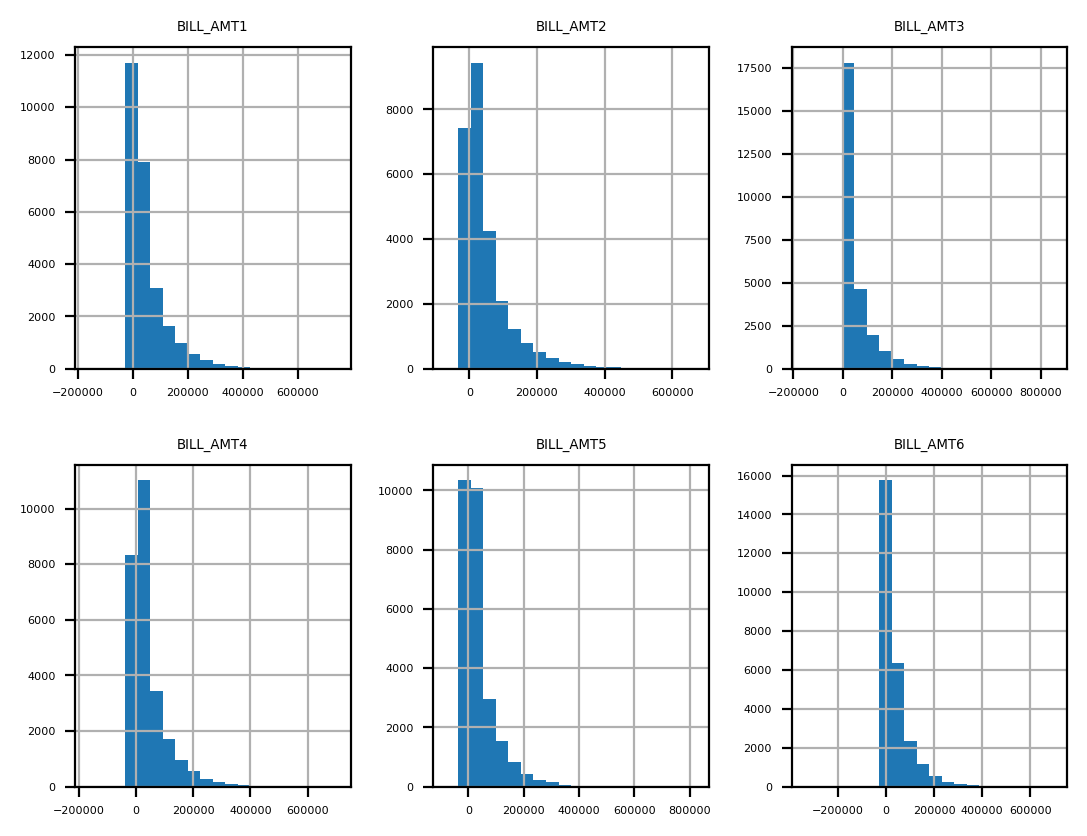

In [6]:
mpl.rcParams['font.size'] = 4
bill_amt.hist(bins=20,layout=(2,3))

In [7]:
pay_amt.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

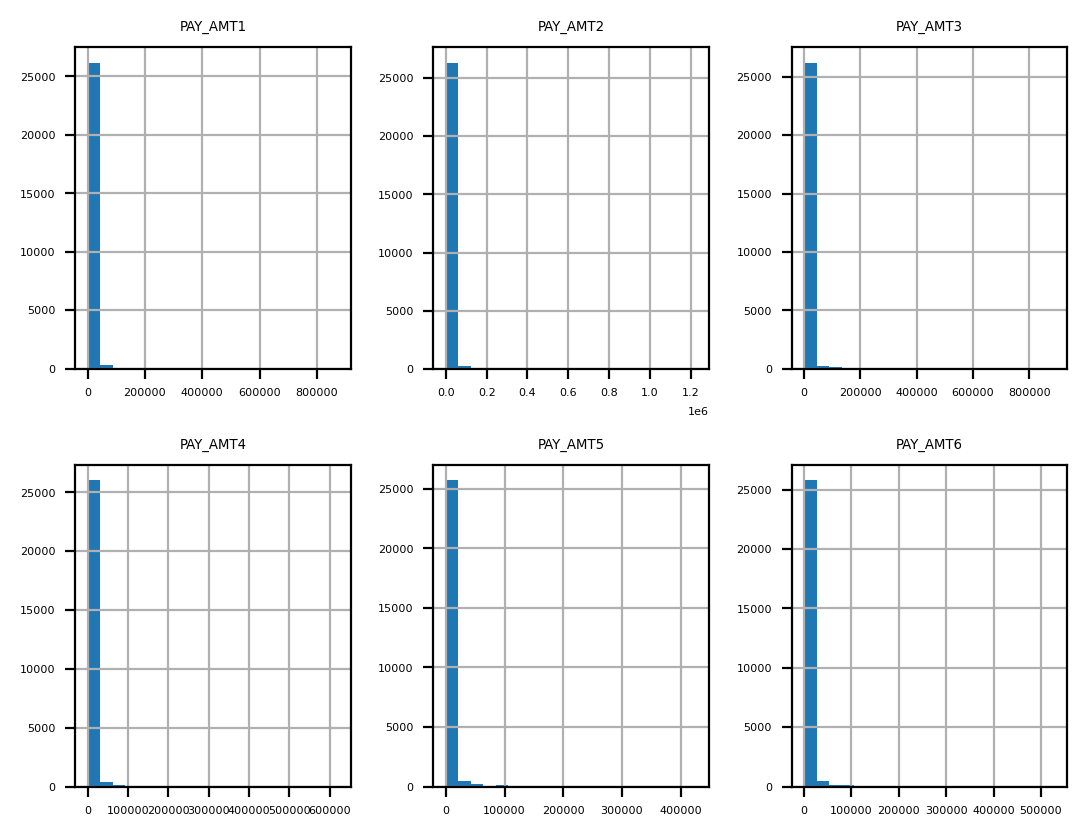

In [8]:
mpl.rcParams['font.size'] = 4
pay_amt.hist(bins=20,layout=(2,3))

In [9]:
# I tried a different method, will have to come back to this

#if  pay_amt["PAY_AMT1"] == 0  and pay_amt["PAY_AMT2"] == 0 and  pay_amt["PAY_AMT3"] == 0 and  pay_amt["PAY_AMT4"] == 0 and  pay_amt["PAY_AMT5"] == 0 and  pay_amt["PAY_AMT6"] == 0:
#    pay_amt["is zero"] = "yes"
#else:
#    pay_amt["is zero"] = "no"

In [10]:
df_zero_mask = df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,True,True,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,True,True,False
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,True,False,True,True
26660,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,True,False,True,True
26661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
26662,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,True


In [11]:
feature_zero_mask = df_zero_mask.iloc[:,18:23].all(axis=1)

In [12]:
sum(feature_zero_mask)
# there are 1490 rows
# filter them out

1409

In [13]:
df_clean_3 = df.loc[~feature_zero_mask,:].copy()

In [14]:
df_clean_3.shape
# 26664 - 25255 = 1409 so this checks out

(25255, 30)

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

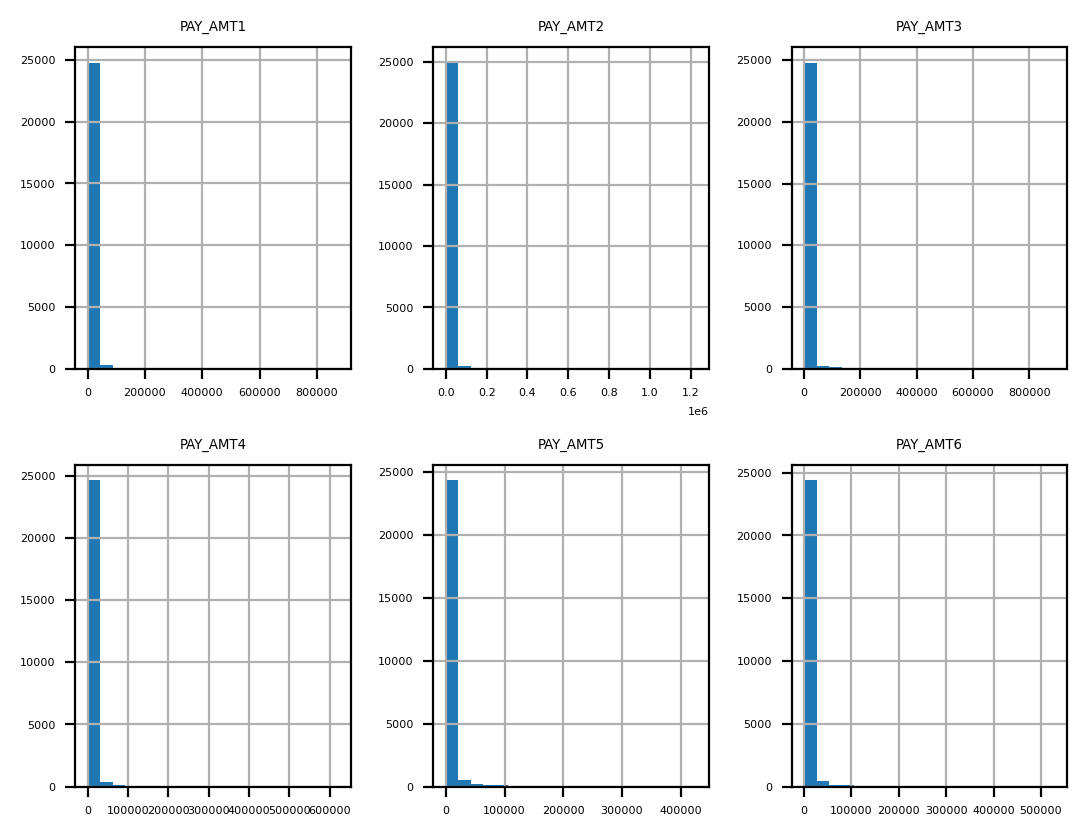

In [15]:
pay_amt_clean_1 = df_clean_3.loc[:,'PAY_AMT1':'PAY_AMT6']
mpl.rcParams['font.size'] = 4
pay_amt_clean_1.hist(bins=20,layout=(2,3))

In [16]:
pay_amt_clean_1.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,25255.000000,2.525500e+04,25255.000000,25255.000000,25255.000000,25255.000000
mean,6022.322035,6.209222e+03,5552.948208,5159.701722,5113.966185,5507.677569
std,17102.992317,2.175130e+04,17694.564086,16352.475010,15689.086246,18009.852149
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1200.000000,1.088000e+03,696.000000,469.500000,435.000000,384.000000
50%,2400.000000,2.200000e+03,2000.000000,1726.000000,1800.000000,1700.000000
75%,5390.500000,5.032500e+03,5000.000000,4451.500000,4500.000000,4352.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [24]:
pay_amt_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25255 entries, 0 to 26663
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PAY_AMT1  25255 non-null  int64
 1   PAY_AMT2  25255 non-null  int64
 2   PAY_AMT3  25255 non-null  int64
 3   PAY_AMT4  25255 non-null  int64
 4   PAY_AMT5  25255 non-null  int64
 5   PAY_AMT6  25255 non-null  int64
dtypes: int64(6)
memory usage: 1.3 MB


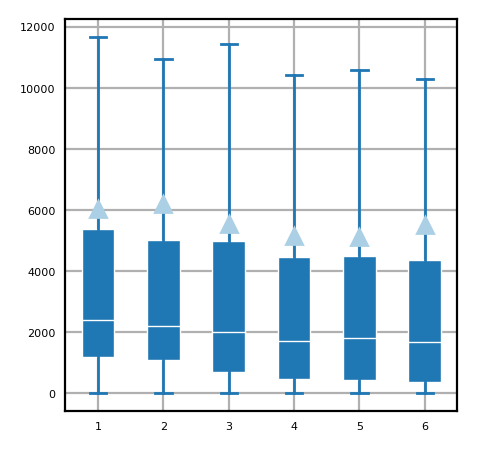

In [38]:
## let's try a boxplot instead
# source
# https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py

plt.style.use('_mpl-gallery')

# define the data
D = pay_amt_clean_1

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, widths=.5, patch_artist=True,
                showmeans=True, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1},
                capprops={"color": "C0", "linewidth": 1})


plt.show()